#Estadística Sobre Centros de Masa.
-------------------------------------------
Chequemos la densidad de centros de masa integrada sobre la matriz en un ataque de 4AP.

In [1]:
Fuentes=readdlm("GarbageCollector/TodosLosFuentes.dat")
Pozos=readdlm("GarbageCollector/TodosLosPozos.dat");

In [3]:
using PyPlot

In [75]:
using JLD

In [10]:
HistoCuentasFuentes=hist2d(Fuentes[:,1:2],64,64)
HistoCuentasPozos=hist2d(Pozos[:,1:2],64,64);

In [110]:
HistoCuentasFuentes[3]

64x64 Array{Int64,2}:
 182  136  142  116  112   81  120  103  …   91   61   93   74   71  100  274
 136   32   56   82   81   48   74   56      63   34   76   72   75   90  166
 123   54   63   77   87  119  140   80      52   47   55   87   91  116  171
 112  123   85  112   84   82   91   94      53   39   25   61   57   58  152
 101  116   66   30   61   83   38   92      26   13   14   51   41   58   97
 112   80   69   46   47   47   65   82  …   29   23   31   51   37   63  164
  99   77   93   82   71   58   70  115      24   18   23   45   33   28  273
 126   96  105   79   94   92   89   72      28   14    9   30   45   54  147
  74   63   83   63   48   52   81   58      25   17   19   40   21   36   83
 130   59   81  109   49   57   74   72      41   23   18   22   39   69  130
 105   83   95   73  104   99   41   48  …   40   23   29   24   14   39  146
 142   99   60   46  127   71    6   13      45   24   48   22   26   28  111
  98   72   44   60   93   81   16   50   

In [48]:
function HistoCSDMatrix(datos::Array)
    result=zeros(64,64)
    tantos=length(datos[:,1])
    for j=1:tantos
        k=floor(Int,datos[j,1])
        l=floor(Int,datos[j,2])
        peso=abs(datos[j,3])
         #println((j,k))
        result[l,k]+=peso
    end
    return result
end

HistoCSDMatrix (generic function with 1 method)

In [57]:
TuAbuelaFuentes=HistoCSDMatrix(Fuentes)
extrema(TuAbuelaFuentes)

(62.61407015569047,37618.7475584581)

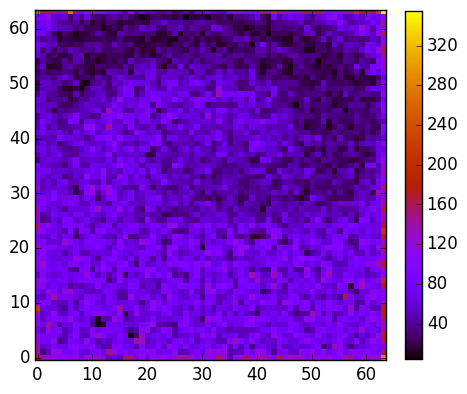

In [118]:
figure(figsize=(5,5))
bla=imshow(transpose(HistoCuentasFuentes[3]), origin="lower", interpolation="nearest",cmap="gnuplot")
cb=colorbar(bla,fraction=0.045)
savefig("HistoCuentasFuentes01.svg",dpi=90)

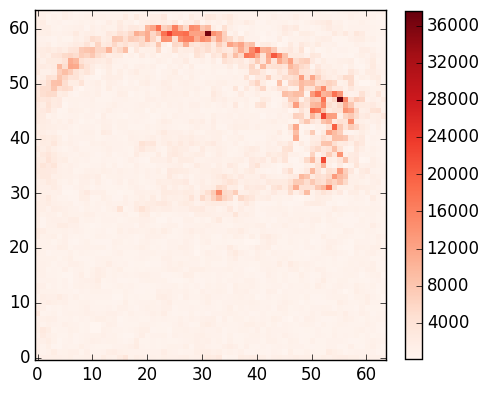

In [73]:
figure(figsize=(5,5))
HF=imshow(TuAbuelaFuentes, cmap="Reds",origin="lower", interpolation="nearest")
cb=colorbar(HF,fraction=0.045)
savefig("DensidadCMFuentres01.svg",dpi=90)

In [69]:
TuAbuelaPozos=HistoCSDMatrix(Blues)
extrema(TuAbuelaPozos)

LoadError: LoadError: UndefVarError: Blues not defined
while loading In[69], in expression starting on line 1

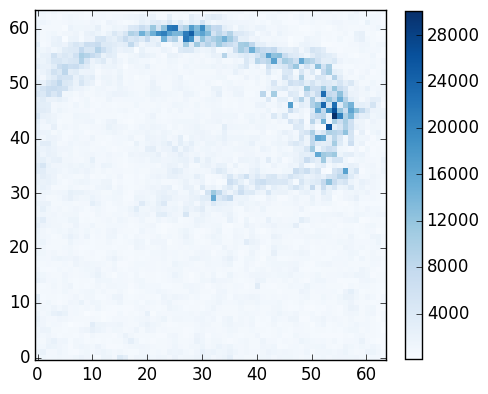

In [72]:
figure(figsize=(5,5))
HF=imshow(TuAbuelaPozos, cmap="Blues",origin="lower", interpolation="nearest")
cb=colorbar(HF,fraction=0.045)
savefig("DensidadCMPozos01.svg",dpi=90)

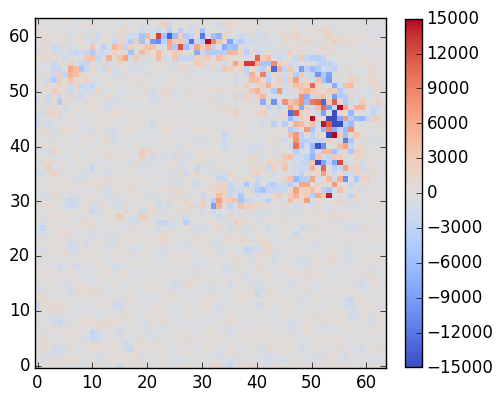

In [71]:
TuAbuela=TuAbuelaFuentes-TuAbuelaPozos;
limite=15000
figure(figsize=(5,5))
HF=imshow(TuAbuela, cmap="coolwarm",origin="lower", interpolation="nearest",vmin=-limite,vmax=limite)
cb=colorbar(HF,fraction=0.045)
savefig("DensidadSignadadeCentros01.svg",dpi=90)

In [84]:
LFP=load("DatosLFP4APusadosPaper.jld")
CSD=load("CSD4APForPaperTotal.jld");

In [86]:
DatosLFP=LFP["LFP"]
DatosCSD=CSD["CSD"];

In [98]:
IntensidadLFPIntegrada=zeros(64,64)
IntensidadCSDIntegrada=zeros(64,64)
CSDIntegrada=zeros(64,64)
LFPIntegrada=zeros(64,64)
for j=1:64, k=1:64
    IntensidadLFPIntegrada[j,k]=sum(abs(DatosLFP[j,k,:]))
    IntensidadCSDIntegrada[j,k]=sum(abs(DatosCSD[j,k,:]))
    CSDIntegrada[j,k]=sum(DatosCSD[j,k,:])
    LFPIntegrada[j,k]=sum(DatosLFP[j,k,:])
end
LogIntensidadLFP=map(x->log(x), IntensidadLFPIntegrada);
LogIntensidadCSD=map(x->log(x), IntensidadCSDIntegrada);


In [105]:
mamaxLFP=maximum(IntensidadLFPIntegrada)
mamaxCSD=maximum(IntensidadCSDIntegrada)
nomaxCSD=maximum(abs(CSDIntegrada))
nomaxLFP=maximum(abs(LFPIntegrada))

17599.7314453125

515.4009117484511

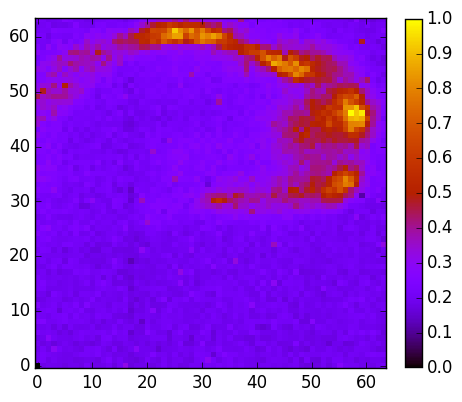

In [93]:
figure(figsize=(5,5))
tlala=imshow(IntensidadLFPIntegrada/mamaxLFP,origin="lower", interpolation="nearest",cmap="gnuplot")
cb=colorbar(tlala, fraction=0.045)
savefig("AbsIntegLFP01.svg",dpi=90)

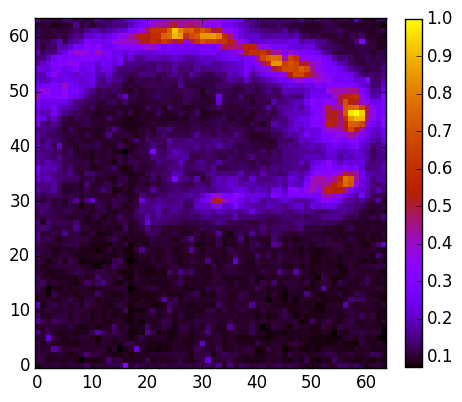

In [94]:
figure(figsize=(5,5))
tlala=imshow(IntensidadCSDIntegrada/mamaxCSD,origin="lower", interpolation="nearest",cmap="gnuplot")
cb=colorbar(tlala, fraction=0.045)
savefig("AbsIntegCSD01.svg",dpi=90)

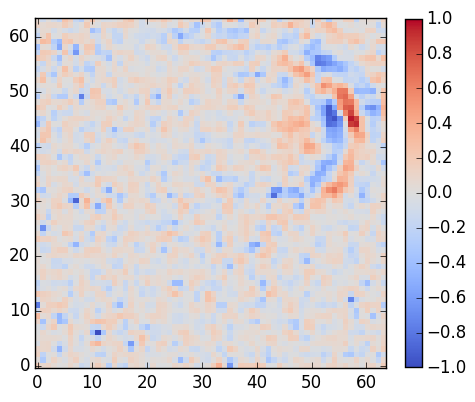

In [104]:
figure(figsize=(5,5))
tlala=imshow(CSDIntegrada/nomaxCSD,origin="lower", interpolation="nearest",cmap="coolwarm",vmin=-1,vmax=1)
cb=colorbar(tlala, fraction=0.045)
savefig("IntegCSD01.svg",dpi=90)

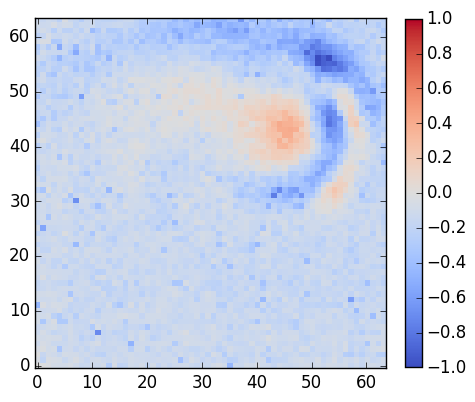

In [106]:
figure(figsize=(5,5))
tlala=imshow(LFPIntegrada/nomaxLFP,origin="lower", interpolation="nearest",cmap="coolwarm",vmin=-1,vmax=1)
cb=colorbar(tlala, fraction=0.045)
savefig("IntegLFP01.svg",dpi=90)